In [1]:
import pandas as pd
from omegaconf import OmegaConf
import os
import matplotlib.pyplot as plt


In [2]:
config = OmegaConf.load("./../../../configs/template_generation.yaml")

In [3]:
category = 'java'

In [4]:
df = pd.read_csv(os.path.join(config.data_path, f'{category}_template_repos.csv'))

In [5]:
df

,id,repo_owner,repo_name,html_url,is_template,description,template_keywords,topics,license,size
0,0,12313kaihuang,Demos,https://github.com/12313kaihuang/Demos,False,一些实际的应用Demo,['demo'],[],Apache License 2.0,114474
1,1,294678380,cloudDemo,https://github.com/294678380/cloudDemo,False,The demo created for Learning of Spring Cloud,['demo'],[],MIT License,54
2,2,3ign0n,TiOpenStreetMap,https://github.com/3ign0n/TiOpenStreetMap,False,example to use Titanium Android OSM module,['example'],[],MIT License,12791
3,3,3pillarlabs,socialauth-android,https://github.com/3pillarlabs/socialauth-android,False,SocialAuth repository which contains socialaut...,['sample'],[],MIT License,3144
4,4,4xes,FlipAnimation,https://github.com/4xes/FlipAnimation,False,Simple example for flip animation,['example'],[],MIT License,1090
...,...,...,...,...,...,...,...,...,...,...
3251,3251,zurche,mvp-firebase,https://github.com/zurche/mvp-firebase,False,This project demonstrates how to setup a proje...,['demo'],[],Apache License 2.0,141
3252,3252,zwwill,yanxuan-weex-demo,https://github.com/zwwill/yanxuan-weex-demo,False,:art: High quality pure Weex demo / 网易严选 App ...,['demo'],['weex'],MIT License,113180
3253,3253,zyj1609wz,RxJava_RxAndroid,https://github.com/zyj1609wz/RxJava_RxAndroid,False,RxJava/RxAndroid Demo,['demo'],[],Apache License 2.0,130
3254,3254,zzh12138,ChannelManageDemo_Java,https://github.com/zzh12138/ChannelManageDemo_...,False,ChannelManageDemo by java,['demo'],[],MIT License,1454


There is 2442/3256 small repos less the 5233.0 is size


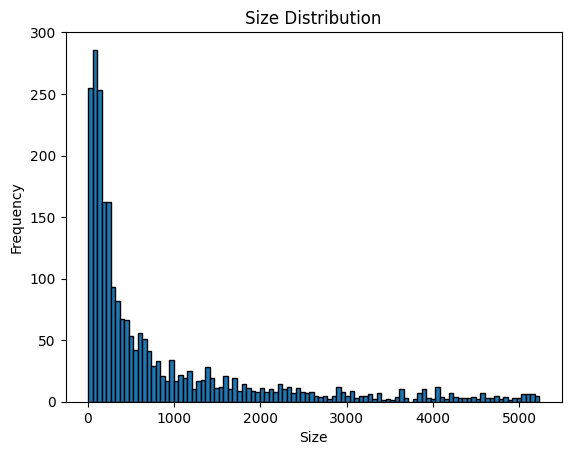

In [6]:
q = df['size'].quantile(0.75)
small_df = df[df['size'] < q]['size']
print(f"There is {len(small_df)}/{len(df)} small repos less the {q} is size")
plt.hist(small_df, bins=100, edgecolor='black')

plt.title('Size Distribution')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

In [7]:
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/Maria.Tigina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Maria.Tigina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

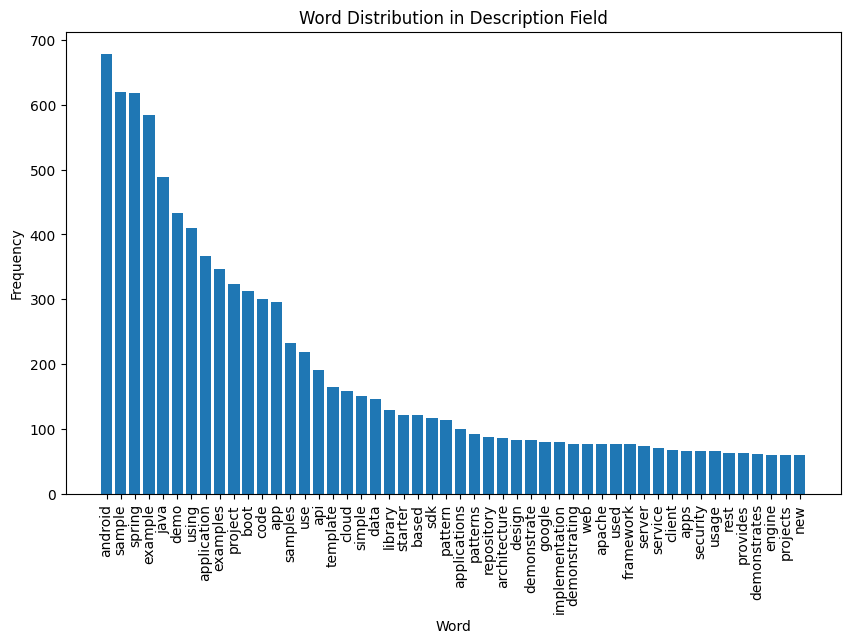

In [8]:
translator = str.maketrans('', '', string.punctuation)
descriptions = " ".join(map(lambda d: str(d), df['description']))
descriptions = descriptions.translate(translator)

tokens = word_tokenize(descriptions)
tokens = [word.lower() for word in tokens]
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if not word in stop_words]
# stemmer = PorterStemmer()
# tokens = [stemmer.stem(word) for word in tokens]

word_counts = Counter(tokens)

word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index').sort_values(by=0, ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(word_counts_df.index[:50], word_counts_df[0][:50])
plt.title('Word Distribution in Description Field')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')

plt.show()

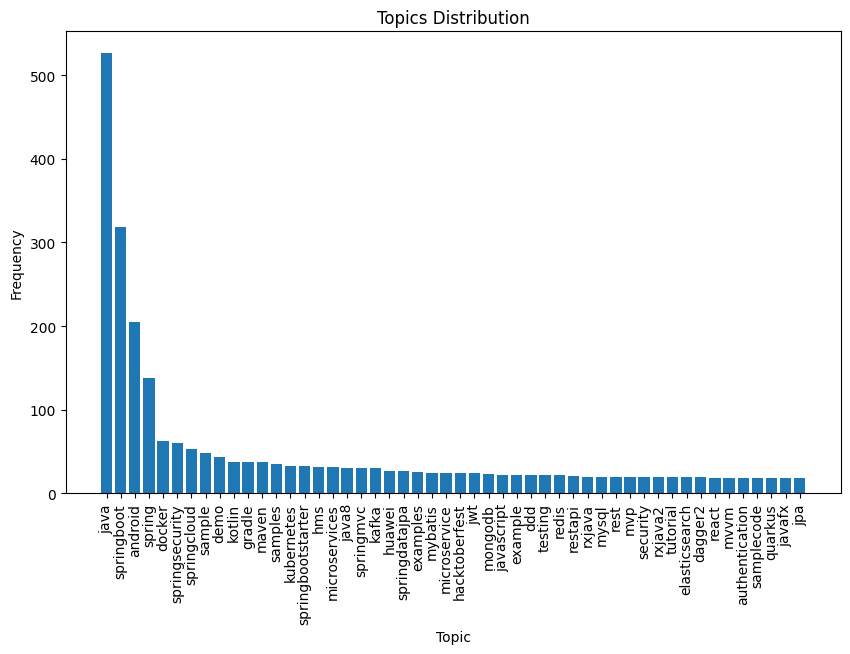

In [10]:
word_counts = Counter(tokens)

topics = " ".join(map(lambda d: str(d), df['topics']))
topics = topics.translate(translator)

tokens = word_tokenize(topics)
tokens = [word.lower() for word in tokens]
topics_counts = Counter(tokens)
topics_counts_df = pd.DataFrame.from_dict(topics_counts, orient='index').sort_values(by=0, ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(topics_counts_df.index[:50], topics_counts_df[0][:50])
plt.title('Topics Distribution')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')

plt.show()